

# Project: Investigate to a TMDB Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> For the second project of Udacity's termed "Data Analyst Nanodegree", I choose the "TMDb dataset, a subset of IMDb dataset" to do my project, in order to investigate data, perform data analysis and documents the finding

> Question:
> 1. Which generes are most popular from year to year?
> 2. Which genres have highest revenue?
> 3. Which month is the best for releasing movie that have high revenue?
> 4. Top 10 Movies by Rating?
> 5. What kind of properties are associated with movies that have high voting scores?
> 6.  What are the top 10 highest grossing movies?
> 7. what is trend over time for runtimes, popularity and revenues?

In [1]:
#Now let's open it with pandas and set up package we will use

import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
#Set up the csv file as a DataFrame
movies = pd.read_csv("tmdb-movies.csv", sep = ',')

#let's see a preview of data
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# We could also get overall info for the dataset
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1



### Data Cleaning:
> First of all, we need to drop unecessary columns that we don't use to answer our questions (homepage, tagline, keywords, overview)

In [4]:
#remove columns
movies.drop(['imdb_id','homepage','tagline', 'keywords', 'overview','production_companies'], axis =1, inplace = True)
movies.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'runtime', 'genres', 'release_date', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [5]:
#explore dataset
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### Data Cleaning -Find and drop duplicate values
> Find and remove duplicate values in dataset

In [5]:
#check if has any duplicate values
sum(movies.duplicated())

1

In [6]:
#remove duplicate value
movies.drop_duplicates(inplace = True)

#### Data Cleaning -Drop null values

In [7]:
#check if whether has any null values
movies.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

> We can remove the rows that have no director, cast and genre. After this, it should return False when we ask sum of any null values

In [8]:
movies.dropna(inplace = True)
print(movies.isnull().sum().any())
movies.info()

False
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 15 columns):
id                10731 non-null int64
popularity        10731 non-null float64
budget            10731 non-null int64
revenue           10731 non-null int64
original_title    10731 non-null object
cast              10731 non-null object
director          10731 non-null object
runtime           10731 non-null int64
genres            10731 non-null object
release_date      10731 non-null object
vote_count        10731 non-null int64
vote_average      10731 non-null float64
release_year      10731 non-null int64
budget_adj        10731 non-null float64
revenue_adj       10731 non-null float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.3+ MB


#### Data Cleaning -Checking for data types
> As we can see, data type of the release_date is string now, we need to change to datetime  

In [9]:
movies['release_date'] = pd.to_datetime(movies['release_date'])
# check
type(movies['release_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: Which genres are popular year to year?

> genres column cotains multiple values separated by pipe (|) character. It means some movies have more than one genres. We're going to take each genres row and split them into rows - one with values for the first genre (values before the "/"), and the other with values for the second genre type (values after the "/"). 

In [33]:
# First, let's create a dataframe to answer this question
df1 = movies.copy()
df1.drop(['original_title', 'cast', 'director', 'runtime', 'release_date', 'vote_count', 'vote_average','budget_adj',
          'revenue_adj'], axis=1, inplace=True)
genre = df1.loc[:, ['id','genres']]
genre.head()
df1.head()

,id,popularity,budget,revenue,genres,release_year,month
0,135397,32.985763,150000000,1513528810,Action|Adventure|Science Fiction|Thriller,2015,6
1,76341,28.419936,150000000,378436354,Action|Adventure|Science Fiction|Thriller,2015,5
2,262500,13.112507,110000000,295238201,Adventure|Science Fiction|Thriller,2015,3
3,140607,11.173104,200000000,2068178225,Action|Adventure|Science Fiction|Fantasy,2015,12
4,168259,9.335014,190000000,1506249360,Action|Crime|Thriller,2015,4


In [11]:
# split the genres cells by the pipe and add to a different row
reshaped = \
(genre.set_index(genre.columns.drop('genres',1).tolist())
   .genres.str.split('|', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'genres'})
   .loc[:, genre.columns])

print(reshaped)

           id           genres
0      135397           Action
1      135397        Adventure
2      135397  Science Fiction
3      135397         Thriller
4       76341           Action
5       76341        Adventure
6       76341  Science Fiction
7       76341         Thriller
8      262500        Adventure
9      262500  Science Fiction
10     262500         Thriller
11     140607           Action
12     140607        Adventure
13     140607  Science Fiction
14     140607          Fantasy
15     168259           Action
16     168259            Crime
17     168259         Thriller
18     281957          Western
19     281957            Drama
20     281957        Adventure
21     281957         Thriller
22      87101  Science Fiction
23      87101           Action
24      87101         Thriller
25      87101        Adventure
26     286217            Drama
27     286217        Adventure
28     286217  Science Fiction
29     211672           Family
...       ...              ...
26723   

In [12]:
# merge dataset
merge_df = pd.merge(df1,reshaped, left_on= 'id',right_index=True)
merge_df.drop(['genres_x','id_x','id_y'], axis = 1, inplace = True)
merge_df.rename(columns={'genres_y':'genres'}, inplace=True)
merge_df.head()


,id,popularity,budget,revenue,release_year,genres
186,10317,0.795762,28000000,7002261,2015,Thriller
710,189,1.840817,65000000,39407616,2014,Crime
1329,11,12.037933,11000000,775398007,1977,Action
1330,691,2.379469,14000000,185438673,1977,Crime
1331,11319,1.719385,1200000,71215869,1977,Family


> Now we can see the dataset of genres, popularity and release_year over years. Next I will create a bar to view different types of genres and relative frequencies in which they occur

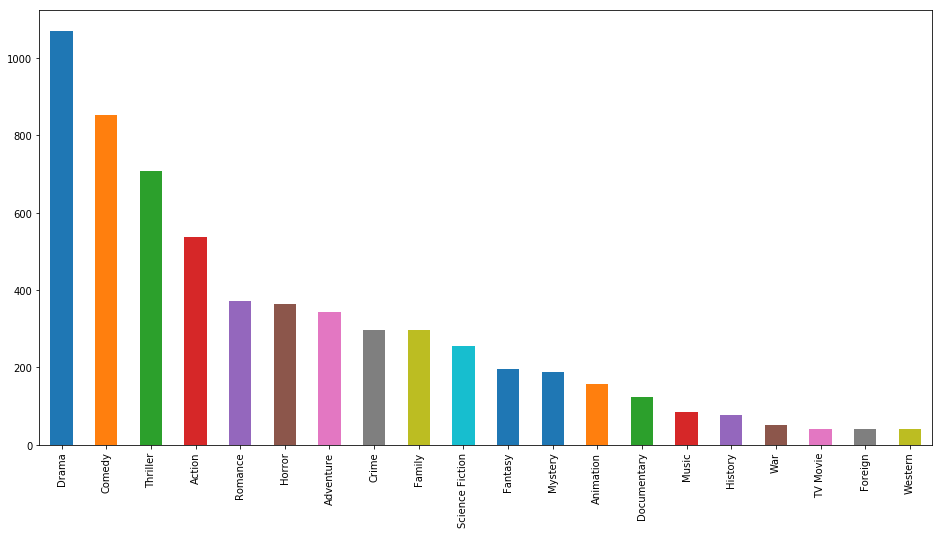

In [13]:
merge_df['genres'].value_counts().plot(kind='bar', figsize=(16, 8));

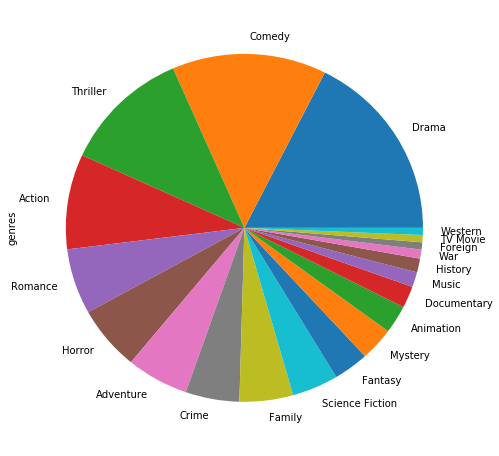

In [16]:
# We also can see in the pie chart
merge_df['genres'].value_counts().plot(kind = "pie", figsize = (8,8))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb41d336eb8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fb41ce3ef60>]], dtype=object)

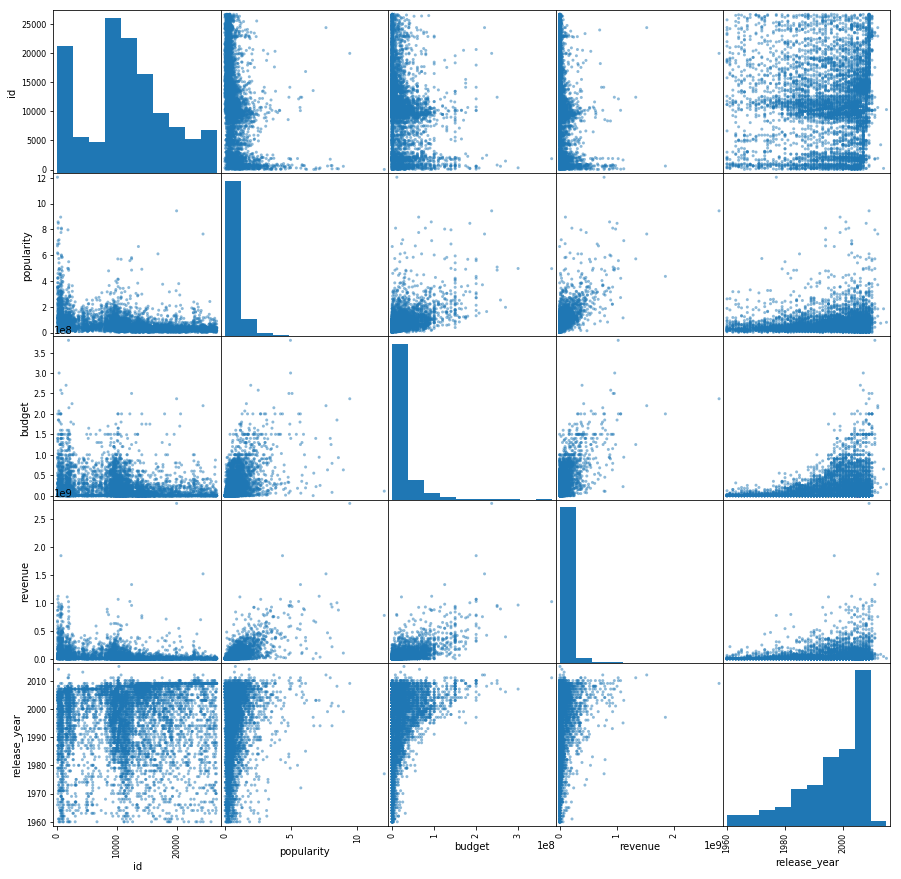

In [14]:
#we also can see scatter plot
pd.plotting.scatter_matrix(merge_df, figsize = (15,15))

> we can see top 5 of genres that popular are drama, comedy, thriller, action and romance. Drama is the most frequenly made. 

### Research Question 2:Which genres have highest revenue?

In [15]:
# WE can also use pivot tables instead of groupby

# Pivot table of genres
pivot = merge_df.pivot_table(index=['genres'])
pivot

,budget,id,popularity,release_year,revenue
genres,,,,,
Action,1.948567e+07,11587.152416,0.667727,1996.529740,4.985414e+07
Adventure,1.729396e+07,11845.334302,0.665453,1996.924419,4.686957e+07
Animation,1.436533e+07,10327.569620,0.773354,1995.702532,4.406840e+07
Comedy,1.799382e+07,11688.590856,0.661474,1996.286049,4.527319e+07
Crime,1.873702e+07,11635.861953,0.673772,1996.976431,4.814621e+07
Documentary,1.419599e+07,11063.455285,0.582880,1996.691057,3.858095e+07
Drama,1.824126e+07,11777.674136,0.674564,1996.412698,5.145894e+07
Family,1.949920e+07,11408.983108,0.690222,1996.138514,5.950476e+07
Fantasy,1.379343e+07,12486.805128,0.644551,1995.107692,4.609738e+07


In [16]:
#sort out top 10 genres have highest revenue
pivot_top10 = pivot.nlargest(10,'revenue')
pivot_top10.sort_values(by='revenue', ascending=False)
pivot_top10

,budget,id,popularity,release_year,revenue
genres,,,,,
Family,1.949920e+07,11408.983108,0.690222,1996.138514,5.950476e+07
Science Fiction,1.713898e+07,11207.941406,0.729265,1996.191406,5.176287e+07
Drama,1.824126e+07,11777.674136,0.674564,1996.412698,5.145894e+07
Horror,1.723826e+07,11086.410959,0.679190,1996.304110,5.089162e+07
Thriller,1.723824e+07,11045.432203,0.705971,1996.525424,5.066668e+07
Action,1.948567e+07,11587.152416,0.667727,1996.529740,4.985414e+07
Crime,1.873702e+07,11635.861953,0.673772,1996.976431,4.814621e+07
War,1.774499e+07,10683.019608,0.709262,1992.941176,4.748516e+07
Romance,1.795111e+07,11797.822102,0.655144,1996.574124,4.717734e+07


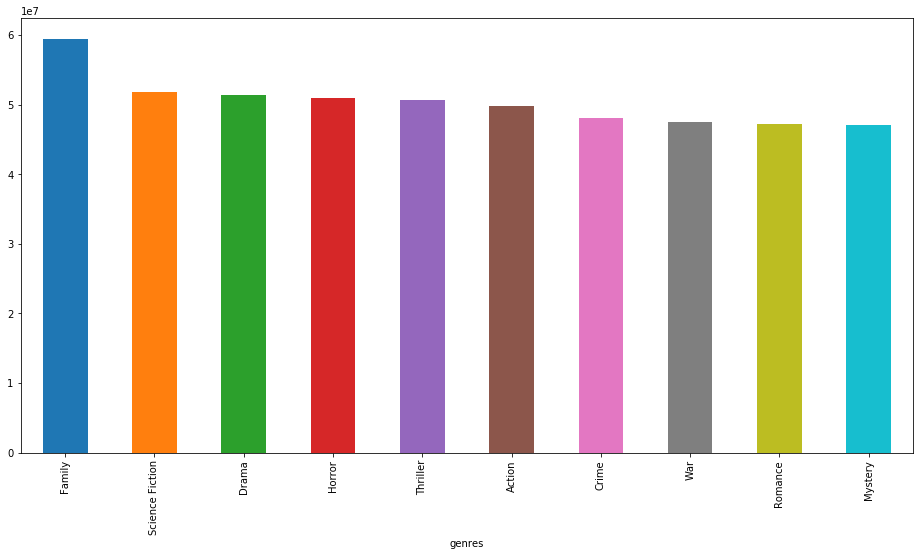

In [17]:
# Create a bar chart
pivot_top10['revenue'].plot(kind='bar', figsize=(16, 8));

The genre has the highest revenue is science fiction. The second is documentary as we can see from the chart above.

### Research Question 3:Which month is the best for releasing movie that have high revenue?

In [18]:
#create new column called "month" to indicate the month of releasing film/show
movies['month'] = movies['release_date'].apply(lambda x: x.month)
movies.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,5
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,3
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,12
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,4


In [19]:
#group by month and sum the revenue
month_revenue= movies.groupby('month')['revenue'].sum()
month_revenue

month
1     12968479332
2     19793785507
3     31393443375
4     26392671428
5     50454865815
6     61660585217
7     45337825481
8     25477766900
9     25731466985
10    29353709677
11    45896250786
12    58211863204
Name: revenue, dtype: int64

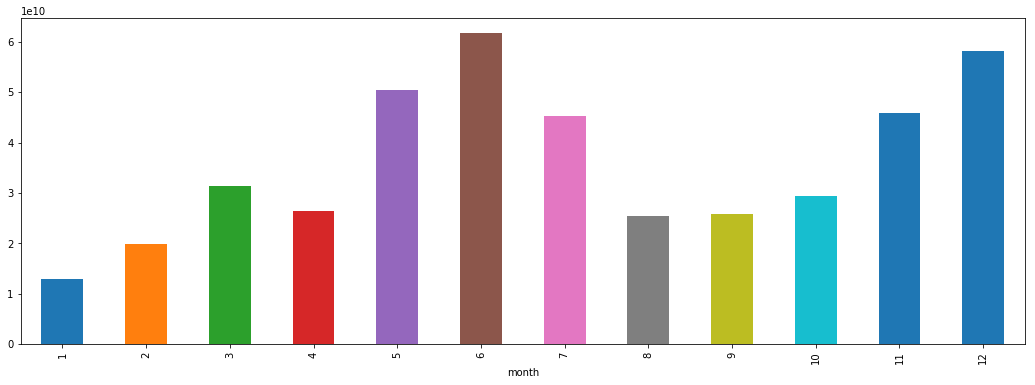

In [20]:
month_revenue.plot(kind = 'bar', figsize = (18,6))

It seems like the movies that released on June has the highest revenue

### Research Question 4:Top 10 Movies by Rating

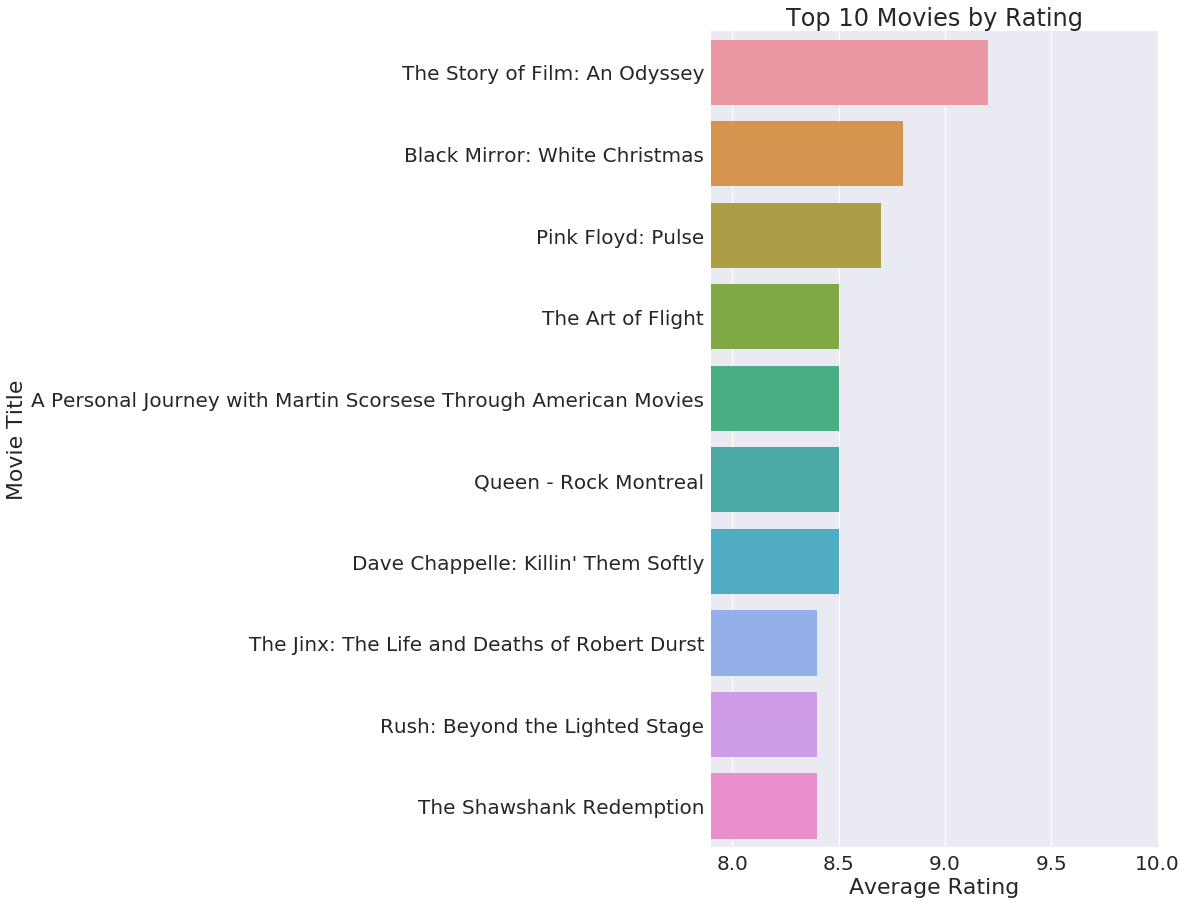

In [21]:
# Top 10 rating
movies_top10 = movies.nlargest(10,'vote_average')
#Plot the top 10 movies
sns.set(style="whitegrid");
sns.set(font_scale=2);
f, ax = plt.subplots(figsize=(8,15));
ax = sns.barplot(x='vote_average', y='original_title', data=movies_top10);

ax.set(xlim=(7.9,10), ylabel="Movie Title", xlabel="Average Rating");
plt.title('Top 10 Movies by Rating');

> As shown in the plot above, the top rated movie is The Story of Film: An Odyssey with a rating of 9.3

### Research Question 5: What kind of properties are associated with movies that have high revenue?

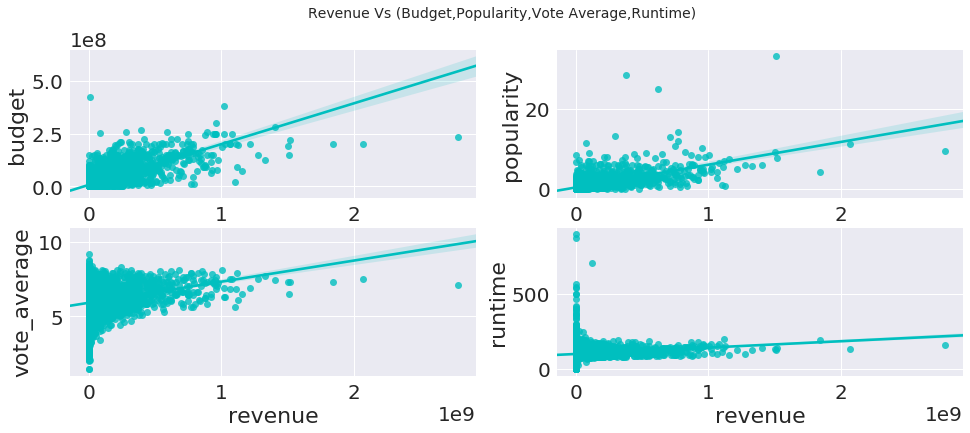

In [22]:
fig, axes = plt.subplots(2,2,figsize = (16,6))
fig.suptitle("Revenue Vs (Budget,Popularity,Vote Average,Runtime)",fontsize=14)
#info.plot(x = ['revenue'],y = ['budget'],kind = "scatter",ax = axes[0][0])
sns.regplot(x= movies['revenue'], y= movies['budget'],color='c',ax=axes[0][0])
sns.regplot(x= movies['revenue'], y= movies['popularity'],color='c',ax=axes[0][1])
sns.regplot(x= movies['revenue'], y= movies['vote_average'],color='c',ax=axes[1][0])
sns.regplot(x= movies['revenue'], y= movies['runtime'],color='c',ax=axes[1][1])
#axes.scatter(info['revenue'],info['vote_average'])
sns.set_style("whitegrid")

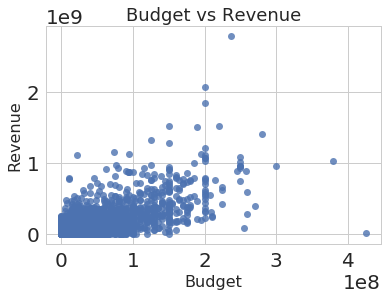

In [23]:
# Plotting scatterplots to view correlation visually

sns.regplot(x = movies['budget'], y = movies['revenue'], fit_reg = False)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.title('Budget vs Revenue', fontsize = 18)
plt.xlabel('Budget', fontsize = 16)
plt.ylabel('Revenue', fontsize = 16);

### Research Question 6:  What are the top 10 highest grossing movies?

> We also can see list for top 10 titles have highest revenues

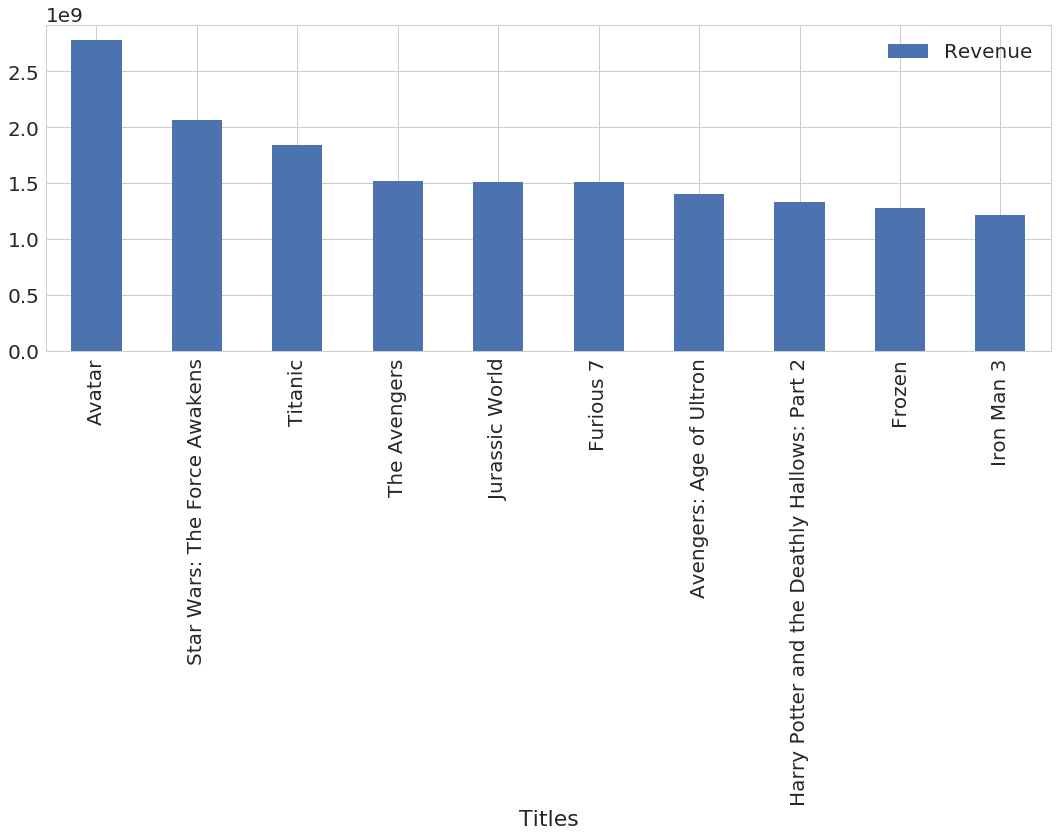

In [25]:
sort_revenue = movies['revenue'].sort_values(ascending = False)[:10]
high_grossers = pd.DataFrame()
title = []
revenue =[]
for i in sort_revenue.index:
    title.append(movies.loc[i,'original_title'])
    revenue.append(sort_revenue.loc[i])
high_grossers['Titles'] =title
high_grossers['Revenue'] = revenue
high_grossers.set_index('Titles', inplace = True)
high_grossers.plot(kind = 'bar', figsize =(18,6))



In [26]:
# take the list of movies
high_grossers

,Revenue
Titles,
Avatar,2781505847
Star Wars: The Force Awakens,2068178225
Titanic,1845034188
The Avengers,1519557910
Jurassic World,1513528810
Furious 7,1506249360
Avengers: Age of Ultron,1405035767
Harry Potter and the Deathly Hallows: Part 2,1327817822
Frozen,1274219009


### Research Question 7:  what is trend over time for runtimes, popularity and revenues?

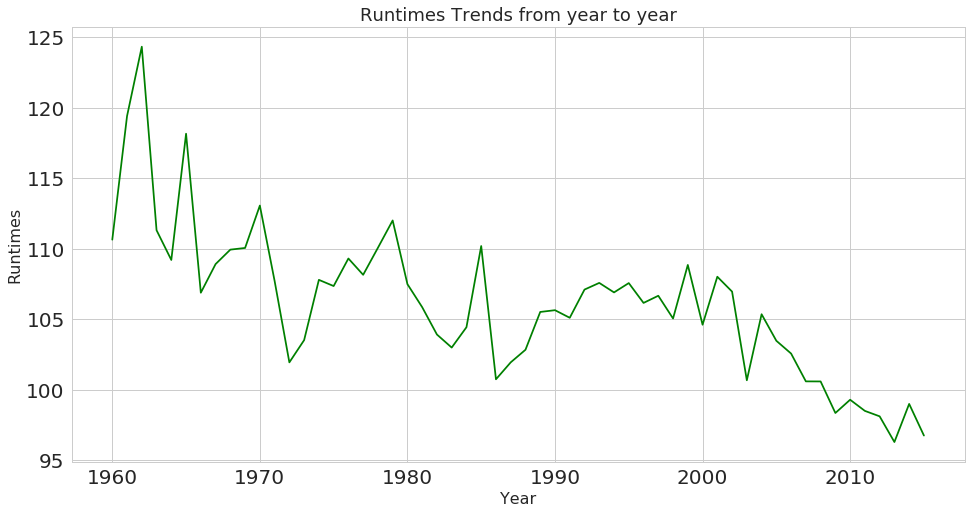

In [27]:
movies.groupby('release_year')['runtime'].mean().plot(kind = 'line', figsize = (16, 8), color = 'g')
plt.title('Runtimes Trends from year to year', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Runtimes', fontsize = 16);

> The runtime of movies has increased with each passsing year. It experienced a hike during the 60s but has then steadily decreased over the years. The lowest was around 85-95 mintues. Presently, movies tend to last around the 90 minutes. Seems like people now tend to watch some movie with short runtimes only.

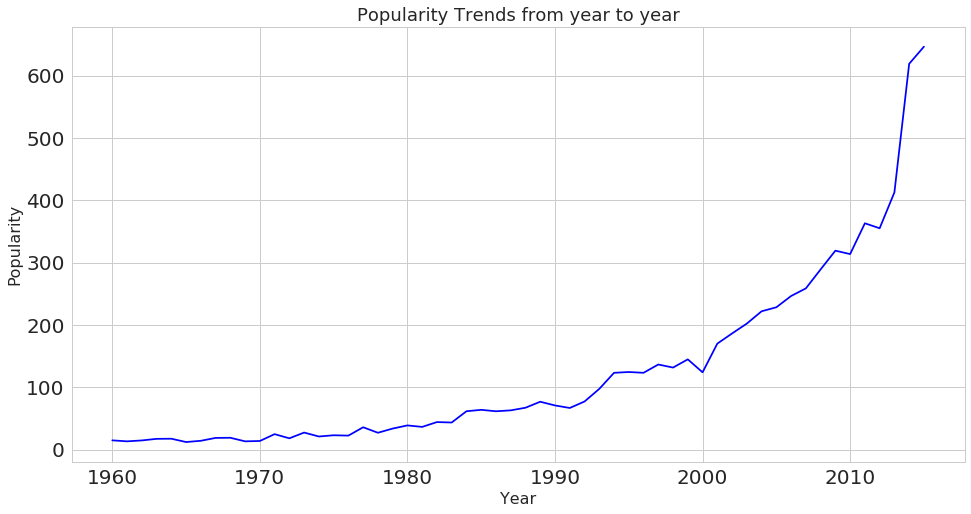

In [29]:
movies.groupby('release_year')['popularity'].sum().plot(kind = 'line', figsize = (16, 8), color = 'b')
plt.title('Popularity Trends from year to year', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Popularity', fontsize = 16);

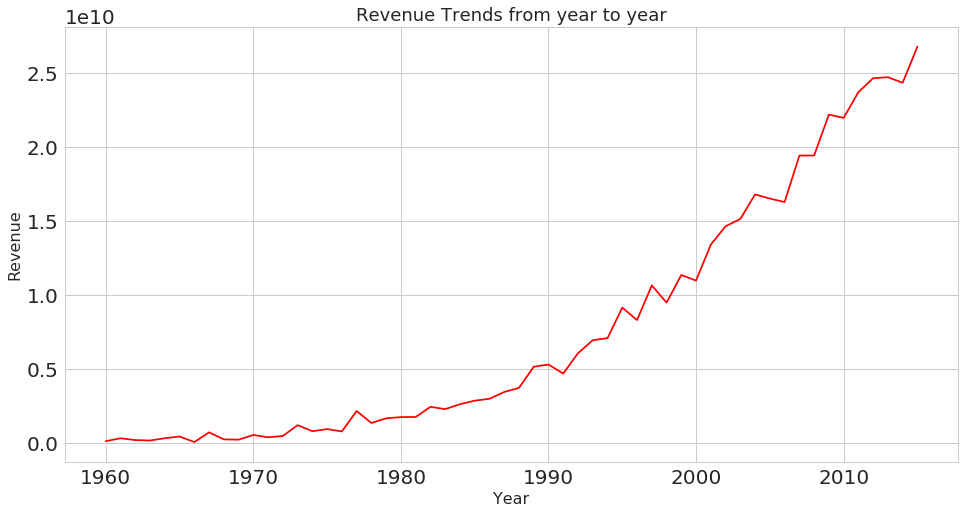

In [30]:
movies.groupby('release_year')['revenue'].sum().plot(kind = 'line', figsize = (16, 8), color = 'r')
plt.title('Revenue Trends from year to year', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Revenue', fontsize = 16);

> Revenue is increasing over years

<a id='conclusions'></a>
## Conclusions

> Which generes are most popular from year to year?
Top 10 Movies by Rating?
What kind of properties are associated with movies that have high voting scores?
What are the top 10 highest grossing movies?
what is trend over time for runtimes, popularity and revenues?
> Througout the data analysis project, we have come to several conclusions:
 If you are production company and you are thinking which typoe of movie should you produce so that can potientially earn high revenue, my bar chart above concluded that out of the top earning films/shows, drama, comedy, thriller, action and romance are the top 5 with highest revenue. You can produce movies in this genres and expect to have high revenue in return. To be honest, these genres are common trend that people like to watch.
 Which question "what kind of properties are associated with movies that have high voting scores, 
 We also can see op 10 movies have highest grossing
 For runtimes trend over time, we can see the the duration of runtimes has been increasing over time and it is getting shorter and shorter. We might look at this trend when decide how long is duration of the movies.
 Revenue are increasing years 
 
 
 ## References
 
 > nlargest: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html
 > Pivot in pandas: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html
 > Using split in pandas: https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/
 

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [36]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0